# Worksheet 08

Name:  SHOWNDARYA MADHAVAN
UID: U10380918

### Topics

- Clustering Aggregation
- Singular Value Decomposition

### Clustering Aggregation

| Point | C | P |
|-------|---|---|
| A     | 0 | a |
| B     | 0 | b |
| C     | 2 | b |
| D     | 1 | c |
| E     | 1 | d |

a) Fill in the following table where for each pair of points determine whether C and P agree or disagree on how to cluster that pair.

| Pair | Disagreement |
|------|--------------|
| A  B |      1       |
| A  C |      0       |
| A  D |      0       |
| A  E |      0       |
| B  C |      1       |
| B  D |      0       |
| B  E |      0       |
| C  D |      0       |
| C  E |      0       |
| D  E |      1       |


As datasets become very large, this process can become computationally challenging.

b) Given N points, what is the formula for the number of unique pairs of points one can create?

The formula for unique pairs of points would be n(n-1)/2

Assume that clustering C clusters all points in the same cluster and clustering P clusters points as such:

| Point | P |
|-------|---|
| A     | 0 |
| B     | 0 |
| C     | 0 |
| D     | 1 |
| E     | 1 |
| F     | 2 |
| G     | 2 |
| H     | 2 |
| I     | 2 |

c) What is the maximum number of disagreements there could be for a dataset of this size? (use the formula from b)?

(9*8)/2=36

d) If we look at cluster 0. There are (3 x 2) / 2 = 3 pairs that agree with C (since all points in C are in the same cluster). For each cluster, determine how many agreements there are. How many total agreements are there? How many disagreements does that mean there are between C and P?

- Cluster 0: 3 (given)
- Cluster 1: (2*1)/2 = 1
- Cluster 2: (4*3)/2 = 6
- Total agreements = 6+1+3=10
- Number of disagreements = total unqiue pairs - number of agreements = 36-10=26

e) Assuming that filtering the dataset by cluster number is a computationally easy operation, describe an algorithm inspired by the above process that can efficiently compute disagreement distances on large datasets.

Algorithm:
- Convert the data to a dataframe and create a duplicate
- Extract the same column, say C, into two different columns with different column names
- Do the same for P
- Merge these 2 data frames and drop the temporary olumns from step 2 and 3 to get the matches
- Then use the disagreement distance equation based on the matches to calculate the distance

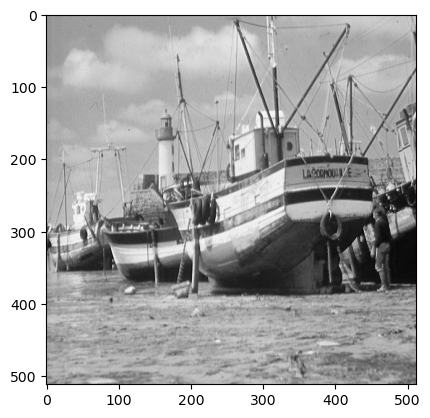

In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

boat = np.loadtxt('./boat.dat')
plt.figure()
plt.imshow(boat, cmap = cm.Greys_r)

a) Plot the singular values of the image above (note: a gray scale image is just a matrix).

In [2]:
u,s,vt=np.linalg.svd(boat,full_matrices=False)
len(s)

512

Notice you can get the image back by multiplying the matrices back together:

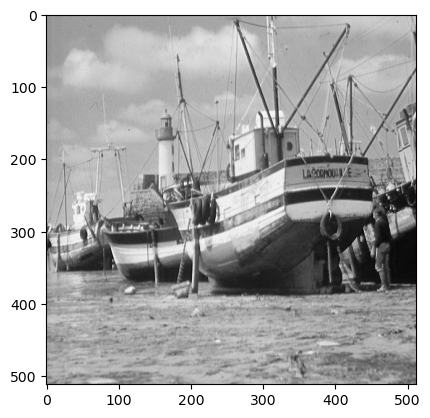

In [3]:
boat_copy = u.dot(np.diag(s)).dot(vt)
plt.figure()
plt.imshow(boat_copy, cmap = cm.Greys_r)

b) Create a new matrix `scopy` which is a copy of `s` with all but the first singular value set to 0.

In [4]:
scopy = s.copy()
scopy[1:]=0

c) Create an approximation of the boat image by multiplying `u`, `scopy`, and `v` transpose. Plot them side by side.

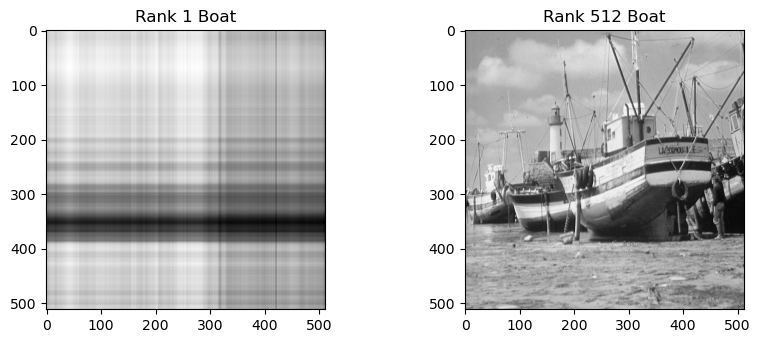

In [5]:
boat_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 1 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

d) Repeat c) with 40 singular values instead of just 1.

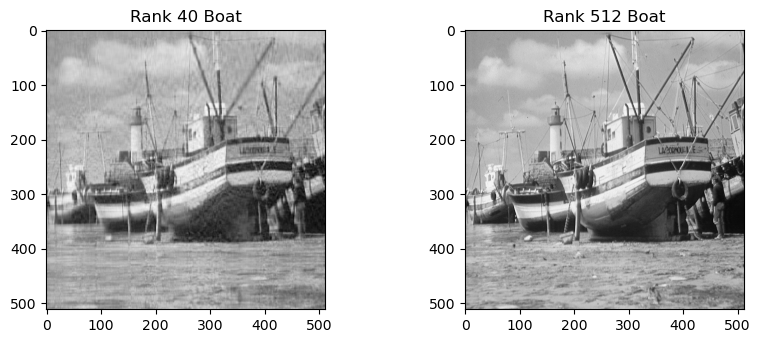

In [6]:
scopy_40 = s.copy()
scopy_40[40:]=0

boat_app_40 = u.dot(np.diag(scopy_40)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app_40, cmap = cm.Greys_r)
plt.title('Rank 40 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

Next, we generate random points on the Euclidean plane:

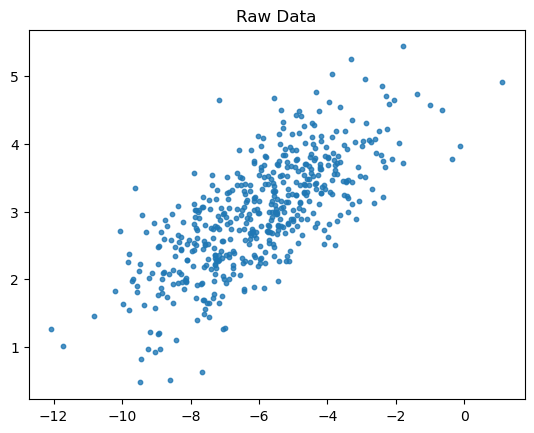

In [7]:
n_samples = 500
C = np.array([[0.1, 0.6], [2., .6]])
X = np.random.randn(n_samples, 2) @ C + np.array([-6, 3])
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Raw Data")
plt.show()

e) Mean-center the data and plot it.

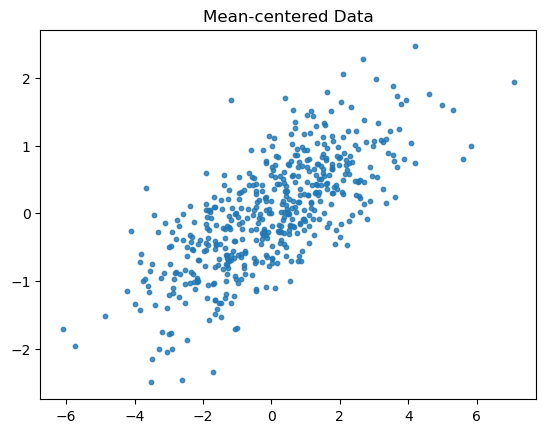

In [27]:
for p in range(len(X)):
    data_centered[p][0] = X[p][0]-X[:,0].mean()
    data_centered[p][1] = X[p][1]-X[:,1].mean()
data_centered = np.asarray(data_centered)
plt.scatter(data_centered[:, 0], data_centered[:, 1], s=10, alpha=0.8)
plt.title("Mean-centered Data")
plt.show()

f) Decompose the mean-centered data using SVD. How many singular values do you expect there will be? Why?

In [28]:
U,D,V = np.linalg.svd(data_centered, full_matrices=False)
print(D)

[45.71744176 12.02708879]


Since the mean-centered data has 2 features, we expect to have at most 2 non-zero singular values as the number of singular values equals the rank of the data matrix.

g) Appoximating the data using either the first or second singular value will result in a 1-dimensional data set (i.e. it fits on a line). If you only had a line to approximate the above data, where would it lie on the plot? explain.

The first principal component captures the direction of maximum variance in the data. 

So if we only had a line to approximate the data, it would lie in the direction of the singular vector associated with the largest singular value, which corresponds to the first principal component and would pass through the center of the data as the data is mean-centered.

h) Approximate the mean-centered data using only the first singular value. Plot both the mean-centered data and the approximation on the same plot using two different colors.

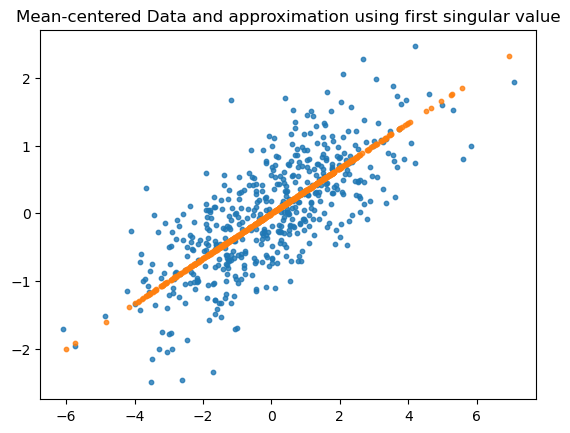

In [29]:
dcopy = D.copy()
dcopy[1:] = 0.0
app1 = U.dot(np.diag(dcopy)).dot(V)
plt.scatter(data_centered[:, 0], data_centered[:, 1], s=10, alpha=0.8)
plt.title("Mean-centered Data and approximation using first singular value")
plt.scatter(app1[:, 0], app1[:, 1], s=10, alpha=0.8)
plt.show()


i) Repeat h) using only the second singular value. Comment on what you observe.

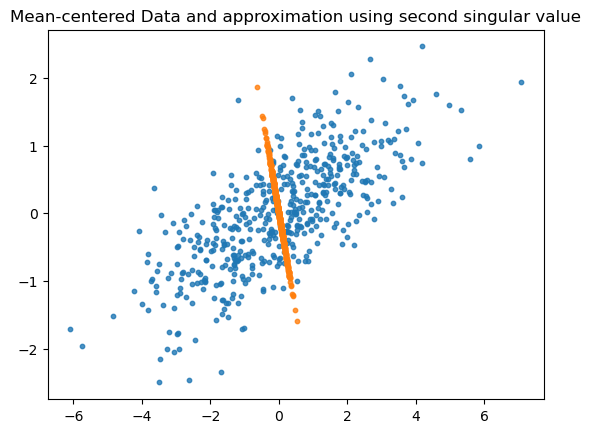

In [30]:
dcopy = D.copy()
dcopy[0] = 0.0
app1 = U.dot(np.diag(dcopy)).dot(V)
plt.scatter(data_centered[:, 0], data_centered[:, 1], s=10, alpha=0.8)
plt.title("Mean-centered Data and approximation using second singular value")
plt.scatter(app1[:, 0], app1[:, 1], s=10, alpha=0.8)
plt.show()


We can see that the two singular value plots are perpendicular to each other